In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("bread basket.csv")

df.head()


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


Checking how many customers we have, as there are duplicate values in 'Transaction' Column

Then we convert the date_time column so we can manipulate it.

In [2]:
df['Transaction'].nunique()
df['date_time'] = pd.to_datetime(df['date_time'])

Here I Manipulate the time column and split it into multiple columns to make it easier to interact with.

First we give the time and hour their own columns:

In [3]:
df['date'] = df['date_time'].dt.date

df['time'] = df['date_time'].dt.time

df['hour'] = df['date_time'].dt.hour

hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
df['hour'] = df['hour'].replace(hour_in_num, hour_in_obj)
df['hour']



0         9-10
1        10-11
2        10-11
3        10-11
4        10-11
         ...  
20502    14-15
20503    14-15
20504    14-15
20505    14-15
20506    15-16
Name: hour, Length: 20507, dtype: object

Secondly, the months, and weekdays.

And after finishing, we can drop the date_time column since we don't need it anymore.

In [4]:


df['month'] = df['date_time'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                ('January','February','March','April','May','June','July','August',
                                'September','October','November','December'))

df['weekday'] = df['date_time'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

df['month']
df['weekday']
df.head(15)
df.drop('date_time', axis = 1, inplace = True)


In [5]:
df.head(15)

,Transaction,Item,period_day,weekday_weekend,date,time,hour,month,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,9-10,October,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,October,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,10-11,October,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,10-11,October,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,10-11,October,Sunday
5,3,Cookies,morning,weekend,2016-10-30,10:07:00,10-11,October,Sunday
6,4,Muffin,morning,weekend,2016-10-30,10:08:00,10-11,October,Sunday
7,5,Coffee,morning,weekend,2016-10-30,10:13:00,10-11,October,Sunday
8,5,Pastry,morning,weekend,2016-10-30,10:13:00,10-11,October,Sunday
9,5,Bread,morning,weekend,2016-10-30,10:13:00,10-11,October,Sunday


Then, we can clean the Item column by removing white spaces, and make them all lowercase.

In [6]:
df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()
df.head(15)
df.Item.value_counts().head(20).index
df.Item.value_counts().head(20).values

array([5471, 3325, 1435, 1025,  856,  771,  616,  590,  540,  379,  374,
        370,  369,  369,  342,  327,  318,  277,  193,  185], dtype=int64)

We will use the matplt and seaborn packages to draw a bar chart of the top 20 items in the dataframe.

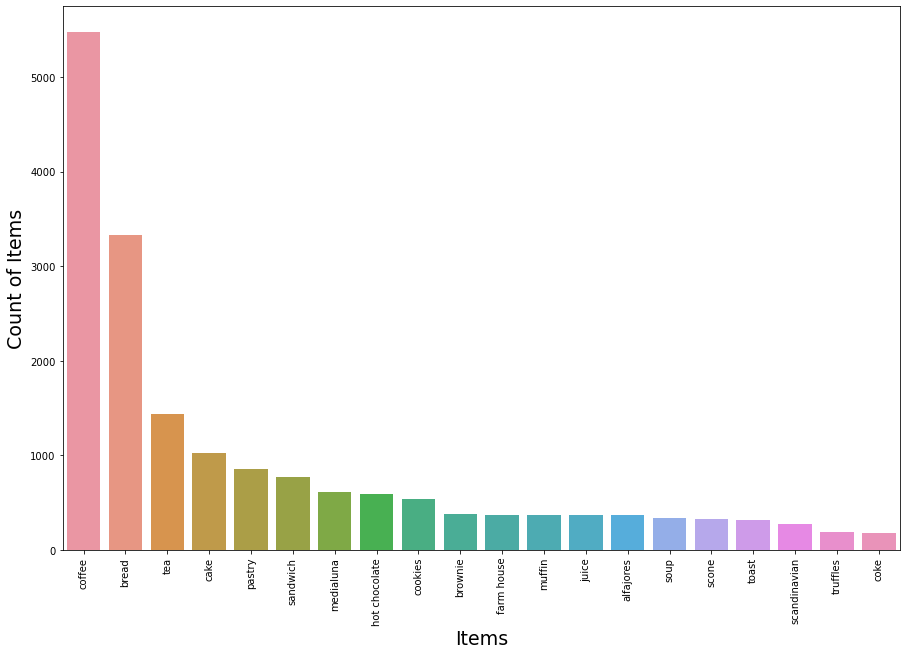

In [7]:
plt.figure(figsize=(15,10))
sns.barplot(x = df.Item.value_counts().head(20).index, y = df.Item.value_counts().head(20).values)
plt.xlabel('Items', size = 19)
plt.xticks(rotation=90)
plt.ylabel('Count of Items', size = 19)
plt.show()

Number of transactions per month:

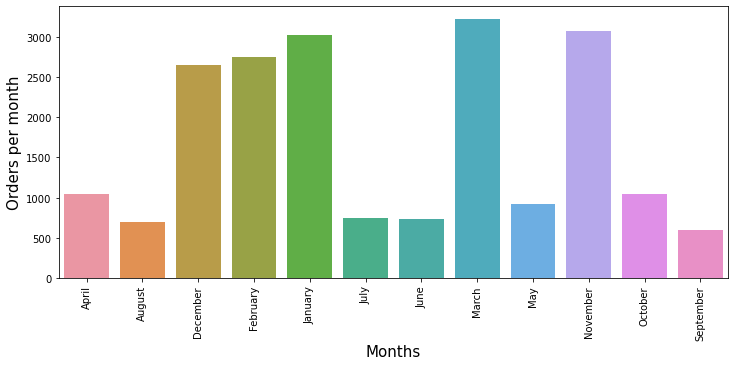

In [8]:
monthTran = df.groupby('month')['Transaction'].count().reset_index()
monthTran.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
#monthTran.sort_values("monthorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTran, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Orders per month', size = 15)
plt.show()


plt.show()

Now the same but for weekdays(group transactions by weekdays and weekends):

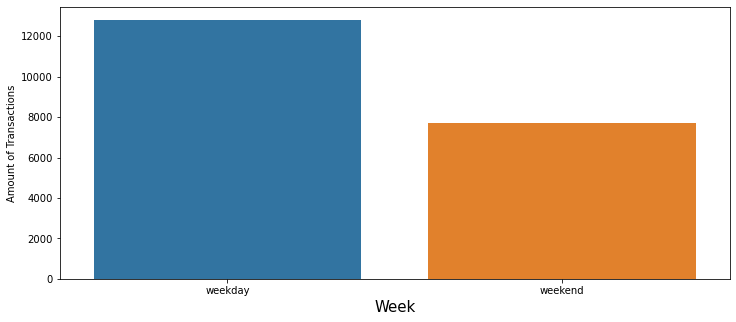

In [9]:
weekTran = df.groupby('weekday_weekend')['Transaction'].count().reset_index()
weekTran.loc[:, "weekdayorder"] = [1,2]
plt.figure(figsize=(12,5))
sns.barplot(data=weekTran, x='weekday_weekend', y='Transaction')
plt.xlabel('Week', size=15)
plt.ylabel('Amount of Transactions')
plt.show()

Obviously, the weekdays have more transactions in them as they are comprised of 5 days, while the weekend is made of only 2 days, so this chart is a bit misleading. 

Therefore, we can make a chart that displays all days individually which will give us more accurate results:

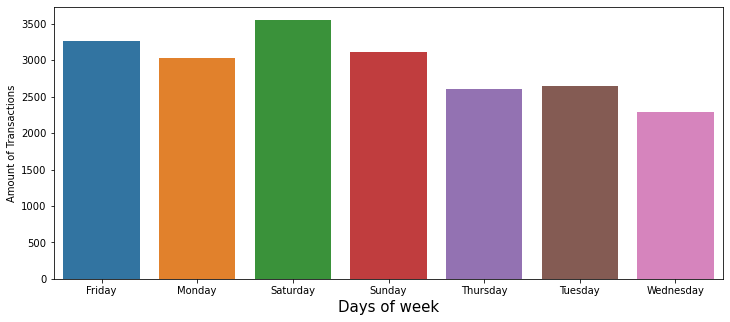

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [10]:
weekTran = df.groupby('weekday')['Transaction'].count().reset_index()
weekTran.loc[:, "weekdayorder"] = [1,2,3,4,5,6,7]
plt.figure(figsize=(12,5))
sns.barplot(data=weekTran, x='weekday', y='Transaction')
plt.xlabel('Days of week', size=15)
plt.ylabel('Amount of Transactions')
plt.show()
tempdata = df.loc[:10,['Transaction','Item']]
tempdata

Now for the apriori algorithm:

The dataset has to be in an appropriate form inorder to use apriori on it, so we will turn it into a list of items, then encode it with the TransactionEncoder function!

In [13]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

d:\Hussein\Languages\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now finally, the algorithm:

In [17]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
sorted_frequent_itemsets


d:\Hussein\Languages\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.478394,(coffee)
0,0.327205,(bread)
8,0.142631,(tea)
1,0.103856,(cake)
9,0.090016,"(coffee, bread)"
6,0.086107,(pastry)
7,0.071844,(sandwich)
5,0.061807,(medialuna)
4,0.058320,(hot chocolate)
10,0.054728,"(cake, coffee)"
